In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import calcLattice
from calcLattice import make_lattice, reset
import draw
from draw import addTripod
%matplotlib inline
import matplotlib as mpl
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from calcLattice import tiles, positions_list, orientations_list, types_list
from calcLattice import gluing_mapping

### The key to using global variables for lists and dictionaries is to remember that they are Objects, so rather than reassigning them, we simply need to clear them and update.

In [3]:
global tiles, positions_list, orientations_list, types_list, gluing_mapping

In [4]:
gluing_mapping.clear()
# gluing_mapping.update({1:0, 2:0, 3:0, 4:0, 5:0, 6:0}) #dimer
# gluing_mapping.update({1:1, 2:0, 3:0, 4:0, 5:0, 6:0}) #dimer
# gluing_mapping.update({1:2, 2:1, 3:0, 4:2, 5:1, 6:0}) #hexamer
#
# gluing_mapping.update({1:4, 2:3, 3:2, 4:1, 5:0, 6:0}) #snow flake
gluing_mapping.update({1:4, 2:3, 3:2, 4:1, 5:0, 6:6}) #chiral L
# gluing_mapping.update({1:4, 2:3, 3:2, 4:1, 5:5, 6:0}) #chiral R
# gluing_mapping.update({1:1, 2:2, 3:3, 4:1, 5:5, 6:6}) #lattice without holes

# gluing_mapping.update({1:4, 2:3, 3:2, 4:1, 5:0, 6:7, 7:6, 8:0, 9:0}) #chiral snowflake
# gluing_mapping.update({1:4, 2:3, 3:2, 4:1, 5:0, 6:7, 7:6, 8:8, 9:0}) # big holes
# gluing_mapping.update({1:1, 2:4, 3:0, 4:2, 5:0, 6:8, 7:9, 8:6, 9:7}) #triangular holes

### Reset tiles, positions_lists, orientations_list, types_list
reset()
make_lattice()

(-25.345000000000006, 27.34500000000001, -25.94204654695474, 29.40604654695474)

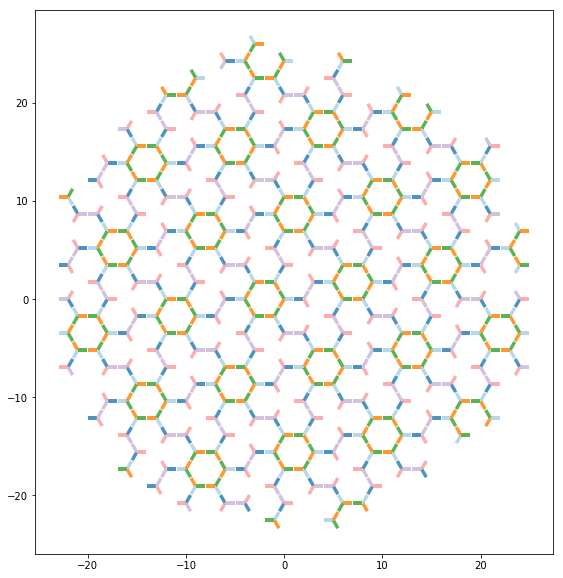

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

allPositions = positions_list

allOrientations = orientations_list #in rad
allTypes = types_list

normi = mpl.colors.Normalize(vmin=0, vmax=1)
colorArray = np.empty((0,3))
patchesList = []

for pos, ort, types in zip(allPositions, allOrientations, allTypes):
    newTripod = addTripod(pos, math.degrees(ort), types)
    colorArray = np.append(colorArray, [newTripod[0]], axis=0)
    patchesList += newTripod[1]

collection = PatchCollection(
        patchesList, cmap=mpl.cm.Paired,
        norm=normi, alpha=0.8)
collection.set_array(colorArray.flatten())
ax.add_collection(collection)

plt.axis('scaled')